In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Reading CSV file with data and looking at it's header to understand which values do we have to work with

In [3]:
sheet_url = "https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0"
url_1 = sheet_url.replace("/edit#gid=", "/export?format=csv&gid=")
data = pd.read_csv(url_1)
print(data.head())

   order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11  


Looking at **summary statistics** for given dataset:
- data contains 5000 orders;
- 100 shops;
- average order amount seems to be 3145.13 (Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.);
- maximum order amount is 704000.00, which looks like an outlier (an observation that lies an abnormal distance from other values) and can be a cause of misleading average order amount calculations.  

In [4]:
print(data.describe())

          order_id      shop_id      user_id   order_amount  total_items
count  5000.000000  5000.000000  5000.000000    5000.000000   5000.00000
mean   2500.500000    50.078800   849.092400    3145.128000      8.78720
std    1443.520003    29.006118    87.798982   41282.539349    116.32032
min       1.000000     1.000000   607.000000      90.000000      1.00000
25%    1250.750000    24.000000   775.000000     163.000000      1.00000
50%    2500.500000    50.000000   849.000000     284.000000      2.00000
75%    3750.250000    75.000000   925.000000     390.000000      3.00000
max    5000.000000   100.000000   999.000000  704000.000000   2000.00000


To take closer look at outliers in order_amount column, let\'s plot the data.

As we can see below, there are quite a few outliers in our dataset.

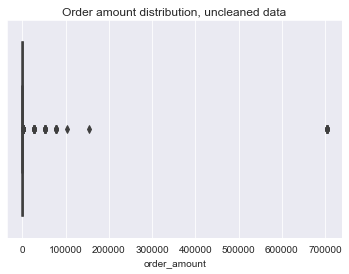

In [68]:
sns.set_style('darkgrid')
sns.boxplot(data = data, x = 'order_amount')
plt.title('Order amount distribution, uncleaned data')
plt.show()

Adding a column with item price, to find any overpriced items.

As we can see, maximum item value is 25725.00, which is way above median value of 153.00 and does not seam right, knowing, that all the shops are selling sneakers.

In [6]:
data['item_price'] = data.order_amount / data.total_items
print(data['item_price'].describe())

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: item_price, dtype: float64


Let's take a look at item prices without 25725.00 outlier. 

We can see, that there is still one item with a price outside of of our range (around 350.00). But as this outlier has not an absurdly high price, we can leave it as a part of our analysis, because it can be some very specific shoe type, like runner shoe for the long distances, that is using innovative technologies or very unique designer shoes.

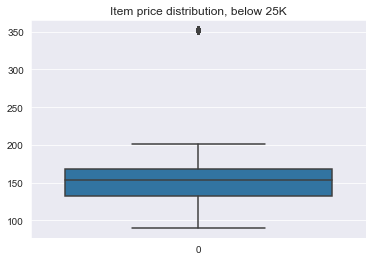

In [69]:
sns.set_style('darkgrid')
sns.boxplot(data = data.item_price[data.item_price < 25000])
plt.title('Item price distribution, below 25K')
plt.show()

Let's find out, who made the highest value purchases.

Below we can see, that all maximum orders where placed by user \#607 in shop \#42 with total items in one order 2000 pieces at 4:00 AM. That should be counted as an outlier, because such customer behaviour is not common and can not be counted in our statistical analysis, as is skewing our data.


In [8]:
print(data[data.order_amount == data.order_amount.max()])

      order_id  shop_id  user_id  order_amount  total_items payment_method  \
15          16       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
520        521       42      607        704000         2000    credit_card   
1104      1105       42      607        704000         2000    credit_card   
1362      1363       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
1562      1563       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
2153      2154       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
2969      2970       42      607        704000         2000    c

Let's find out, what else was user \#607 ordering.

Only purchases made by user \#607 where those, whith maximum total amount, so we can remove this user from our data, to make more acurate statistical findings. 

In [9]:
print(data[data.user_id == 607])

      order_id  shop_id  user_id  order_amount  total_items payment_method  \
15          16       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
520        521       42      607        704000         2000    credit_card   
1104      1105       42      607        704000         2000    credit_card   
1362      1363       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
1562      1563       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
2153      2154       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
2969      2970       42      607        704000         2000    c

What particular shops are selling the most expensive shoes: 

In [70]:
print('Shops selling most expesive shoes: ', data.shop_id[data.item_price > 250].unique())

Shops selling most expesive shoes:  [42 78]


Prices in most expensive shops:

In [71]:
print('Prices in most expensive shops: ', data[(data.shop_id == 42) | (data.shop_id == 78)].item_price.unique())

Prices in most expensive shops:  [  352. 25725.]


As shop with id \#78 sells unrealistically overpriced shoes (over 25000.00), has to be removed from our data for analysis.

Let's take a look at another expensive shop \#42.

Here we can see, that all other users, except user \#607 were ordering small amount of items. 
So we are deciding to leave data containing orders from this shop overall, but to remove orders, made by user with id \#607.

In [12]:
print(data[data.shop_id == 42])

      order_id  shop_id  user_id  order_amount  total_items payment_method  \
15          16       42      607        704000         2000    credit_card   
40          41       42      793           352            1    credit_card   
60          61       42      607        704000         2000    credit_card   
308        309       42      770           352            1    credit_card   
409        410       42      904           704            2    credit_card   
520        521       42      607        704000         2000    credit_card   
834        835       42      792           352            1           cash   
835        836       42      819           704            2           cash   
938        939       42      808          1056            3    credit_card   
979        980       42      744           352            1          debit   
1104      1105       42      607        704000         2000    credit_card   
1362      1363       42      607        704000         2000    c

**Removing outliers**, that we found earlier:
- shop with id \#78 sells unrealistically overpriced shoes (over 25000.00);
- orders made by user \#607, who was ordering same extremely large amounts of high priced items from the same shop.

In [13]:
data_cleaned = data[(data.shop_id != 78) & (data.user_id != 607)]
print(data_cleaned.describe())

          order_id      shop_id      user_id  order_amount  total_items  \
count  4937.000000  4937.000000  4937.000000   4937.000000  4937.000000   
mean   2499.551347    49.846465   849.752279    302.580514     1.994734   
std    1444.069407    29.061131    86.840313    160.804912     0.982821   
min       1.000000     1.000000   700.000000     90.000000     1.000000   
25%    1248.000000    24.000000   775.000000    163.000000     1.000000   
50%    2497.000000    50.000000   850.000000    284.000000     2.000000   
75%    3751.000000    74.000000   925.000000    387.000000     3.000000   
max    5000.000000   100.000000   999.000000   1760.000000     8.000000   

        item_price  
count  4937.000000  
mean    151.788536  
std      29.034215  
min      90.000000  
25%     132.000000  
50%     153.000000  
75%     166.000000  
max     352.000000  


Plotting order amount distribution

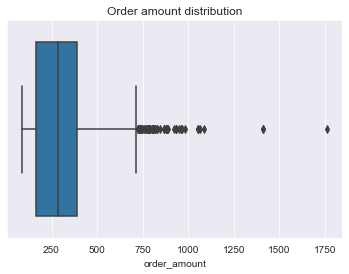

In [72]:
sns.set_style('darkgrid')
sns.boxplot(data = data_cleaned, x = 'order_amount')
plt.title('Order amount distribution')
plt.show()

Printing some summary statistics for the cleaned from outliers data:

In [15]:
print('Average order amount: ', np.round(np.mean(data_cleaned.order_amount), 2), 'that lays between minimum of ',\
      np.min(data_cleaned.order_amount), ' and maximum of ', np.max(data_cleaned.order_amount), '.')
print('Average order contained: ', np.round(np.mean(data_cleaned.total_items)), \
      ' items, with maximum ordered items per single order being ', np.max(data_cleaned.total_items), '.')
print('Average item price is: ', np.round(np.mean(data_cleaned.item_price), 2), ' in range from ',\
      np.min(data_cleaned.item_price), ' to ', np.max(data_cleaned.item_price), '.')

Average order amount:  302.58 that lays between minimum of  90  and maximum of  1760 .
Average order contained:  2.0  items, with maximum ordered items per single order being  8 .
Average item price is:  151.79  in range from  90.0  to  352.0 .


Plotting total orders by store distribution:

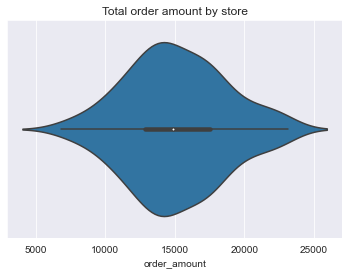

In [16]:
total_order_amount_by_store = data_cleaned.groupby('shop_id').order_amount.sum()
sns.set_style('darkgrid')
sns.violinplot(x = total_order_amount_by_store)
plt.title('Total order amount by store')
plt.show()

In [17]:
print('Average total order amount for one shop is: ', np.round(total_order_amount_by_store.mean(), 2))
print('Minimum total order amount for one shop is: ',data_cleaned.groupby('shop_id').order_amount.sum().min())
print('Maximum total order amount for one shop is: ',data_cleaned.groupby('shop_id').order_amount.sum().max())

Average total order amount for one shop is:  15089.29
Minimum total order amount for one shop is:  6840
Maximum total order amount for one shop is:  23128


Plotting sales count by shop(how many orders each shop made):

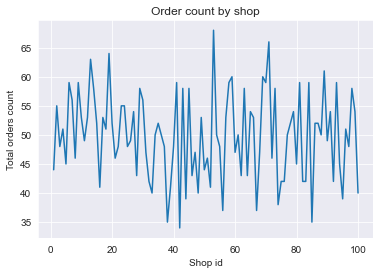

In [18]:
plt.plot(data_cleaned.groupby('shop_id').count()['order_id'])
plt.title('Order count by shop')
plt.xlabel('Shop id')
plt.ylabel('Total orders count')
plt.show()

We can see below, that shop \#53 made 68 sales, which is maximum within shops in our data, while shop \#42 made a minimum of 34 sales.
Average sales count for one shop is:  50.0

In [19]:
order_count = data_cleaned.groupby('shop_id').count()['order_id'].reset_index().sort_values(['order_id'], ascending=False).\
            rename(columns={'order_id': 'sales_count'})
print(order_count)
print('Average sales count for one shop is: ', np.round(np.mean(order_count.sales_count)))

    shop_id  sales_count
52       53           68
70       71           66
18       19           64
12       13           63
87       89           61
..      ...          ...
55       56           37
66       67           37
83       85           35
37       38           35
41       42           34

[99 rows x 2 columns]
Average sales count for one shop is:  50.0


We can see below, that shop \#13 sold 136 pairs, which is maximum within shops in our data, while shop \#42 sold a minimal 63 pairs of sneakers. Average sold items total for one shop is:  99.0 pairs of shoes.

In [20]:
shop_items_total = data_cleaned.groupby('shop_id').sum()['total_items'].reset_index().\
                   sort_values(['total_items'], ascending=False)
print(shop_items_total)
print('Average sold items total for one shop is: ', np.round(np.mean(shop_items_total.total_items)), 'pairs of shoes.')

    shop_id  total_items
12       13          136
82       84          132
52       53          130
70       71          130
79       81          128
..      ...          ...
43       44           71
15       16           71
55       56           69
83       85           67
41       42           63

[99 rows x 2 columns]
Average sold items total for one shop is:  99.0 pairs of shoes.


From scatter plot below, we can see, that middle priced sneackers were sold the most. But there is no strong relationship between price increase and sales increace.

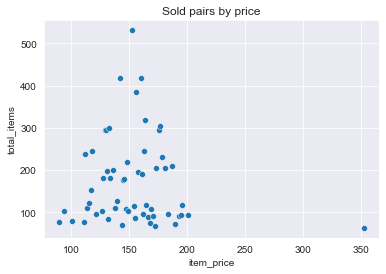

In [21]:
sales_by_price = data_cleaned.groupby('item_price').total_items.sum().reset_index().sort_values(['item_price'])
sns.scatterplot(x = sales_by_price.item_price, y = sales_by_price.total_items)
plt.title('Sold pairs by price')
plt.show()

Finding customer, who ordered the most pairs of sneackers.

Average customer ordered total of:  33.0 pairs of shoes in 30 days period, while customer \#718 ordered total of 58 pairs, which is maximum within data.




In [22]:
customer_orders = data_cleaned.groupby('user_id').total_items.sum().reset_index().sort_values(['total_items'], ascending=False)
print(customer_orders)
print('Average customer ordered total of: ', np.round(np.mean(customer_orders.total_items)), 'pairs of shoes in 30 days period.')

     user_id  total_items
18       718           58
45       745           55
147      847           54
87       787           54
232      932           53
..       ...          ...
239      939           15
19       719           15
50       750           15
112      812           14
202      902           14

[300 rows x 2 columns]
Average customer ordered total of:  33.0 pairs of shoes in 30 days period.


Finding customer, who spent the most.

Average customer spent total of:  4979.0 on sneakers in 30 days period, while customer \#718 spent total of 8952.0, which is maximum within data.

In [23]:
customer_orders_amount = data_cleaned.groupby('user_id').order_amount.sum().reset_index().sort_values(['order_amount'],\
                                                                                                      ascending=False)
print(customer_orders_amount)
print('Average customer spent total of: ', np.round(np.mean(customer_orders_amount.order_amount)),\
      'on sneakers in 30 days period.')

     user_id  order_amount
18       718          8952
87       787          8532
168      868          8317
34       734          8200
147      847          8197
..       ...           ...
17       717          2337
19       719          2314
239      939          2196
202      902          2108
112      812          2102

[300 rows x 2 columns]
Average customer spent total of:  4979.0 on sneakers in 30 days period.


From plot below we can see, that more customers choose to pay with credit card, compared to debit and cash payments, but the difference is not signifficant.

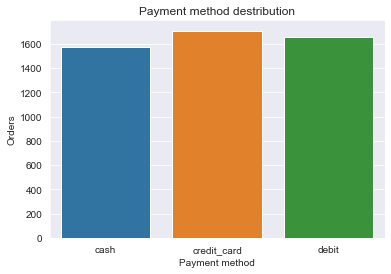

In [24]:
sns.countplot(data=data_cleaned, x='payment_method')
plt.title('Payment method destribution')
plt.xlabel('Payment method')
plt.ylabel('Orders')
plt.show()

Changing type of data in column 'created_at' to datetime, adding new column with extacted hour of purchase and ploting orders by hour.

We can see, that in 24 hour range more orders were placed at 3 and 7 AM, as well as 5 PM (17:00), but there is no signifficant difference in order times.  

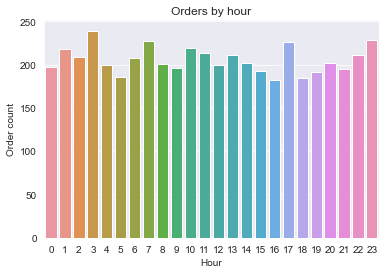

In [40]:
data_cleaned.loc[:, 'created_at'] = data_cleaned.created_at.astype('datetime64[ns]')
data_cleaned.loc[:, 'order_time'] = data_cleaned['created_at'].dt.hour

sns.countplot(x= data_cleaned['order_time'])
plt.title('Orders by hour')
plt.xlabel('Hour')
plt.ylabel('Order count')
plt.show()